# If a player in Blackjack has a 45% chance of winning each hand, and they play 10 hands, what is the probability that they win exactly 6 hands?

# We are measuring the probability that a Blackjack player wins exactly 6 out of 10 hands if the chance of winning each hand is 45%. Each hand is treated as an independent trial with two possible outcomes win or lose making this a binomial probability situation.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time
from math import comb

Number of simulated Blackjack games: 100
Number of games with exactly 6 wins: 15
Empirical probability of winning exactly 6 hands: 0.1500


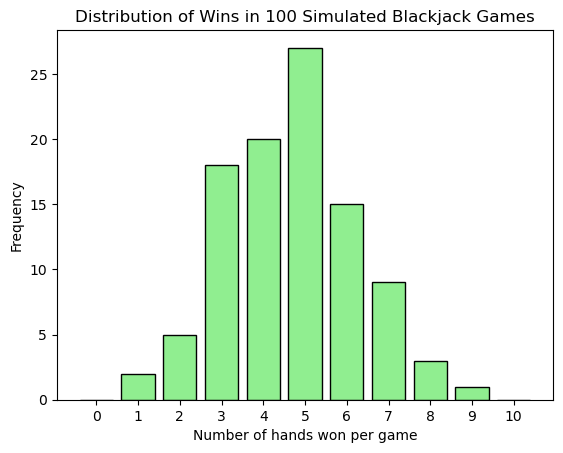

In [10]:
n_hands = 10        # number of hands per game
p_win = 0.45        # probability of winning each hand
n_trials = 100      # simulate 100 games

# -----------------------------
# SIMULATION
# -----------------------------
# Each trial simulates 10 hands: 1 = win, 0 = loss
trials = np.random.binomial(1, p_win, size=(n_trials, n_hands))
wins_per_game = trials.sum(axis=1)

# Probability of winning exactly 6 hands
exact_6_count = np.sum(wins_per_game == 6)
empirical_prob = exact_6_count / n_trials

# -----------------------------
# RESULTS
# -----------------------------
print(f"Number of simulated Blackjack games: {n_trials}")
print(f"Number of games with exactly 6 wins: {exact_6_count}")
print(f"Empirical probability of winning exactly 6 hands: {empirical_prob:.4f}")

# -----------------------------
# VISUALIZATION
# -----------------------------
plt.hist(wins_per_game, bins=range(n_hands + 2), align='left', rwidth=0.8,
         color='lightgreen', edgecolor='black')
plt.xlabel('Number of hands won per game')
plt.ylabel('Frequency')
plt.title('Distribution of Wins in 100 Simulated Blackjack Games')
plt.xticks(range(n_hands + 1))
plt.show()

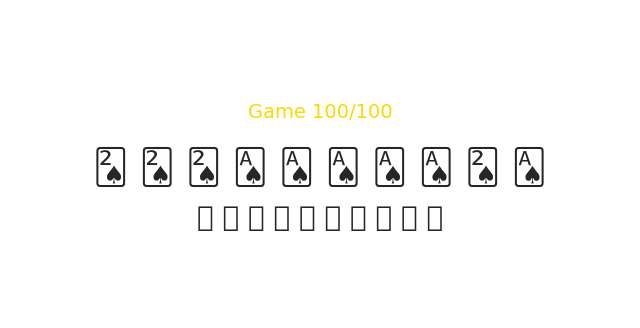

Simulated 100 Blackjack games of 10 hands each.
Games with exactly 6 wins: 13
Empirical probability of exactly 6 wins: 0.1300


In [13]:
n_hands = 10
p_win = 0.45
n_games = 100  # simulate 100 games

# -----------------------------
# SETUP FIGURE
# -----------------------------
fig, ax = plt.subplots(figsize=(8, 4))
plt.style.use('seaborn-v0_8-dark')
ax.set_facecolor("green")
ax.axis('off')

# -----------------------------
# SIMULATION LOOP
# -----------------------------
total_exact6 = 0

for game in range(n_games):
    # Simulate 10 hands: 1 = win, 0 = loss
    hands = np.random.binomial(1, p_win, size=n_hands)
    wins = np.sum(hands)
    if wins == 6:
        total_exact6 += 1

    # Prepare display text
    cards = ["🂡" if np.random.rand() > 0.5 else "🂢" for _ in range(n_hands)]
    results = ["💰" if h == 1 else "❌" for h in hands]

    # Visual update
    clear_output(wait=True)
    ax.clear()
    ax.set_facecolor("green")
    ax.axis('off')
    ax.text(0.5, 0.8, f"🃏 Blackjack Simulation", fontsize=18, ha='center', color='white', weight='bold')
    ax.text(0.5, 0.65, f"Game {game+1}/{n_games}", fontsize=14, ha='center', color='gold')
    ax.text(0.5, 0.45, ' '.join(cards), fontsize=25, ha='center')
    ax.text(0.5, 0.3, ' '.join(results), fontsize=20, ha='center')
    ax.text(0.5, 0.12, f"Wins this game: {wins}", fontsize=14, ha='center', color='white')
    display(fig)

    time.sleep(0.2)  # adjust animation speed

# -----------------------------
# FINAL RESULTS
# -----------------------------
empirical_prob = total_exact6 / n_games
plt.close(fig)

print(f"Simulated {n_games} Blackjack games of 10 hands each.")
print(f"Games with exactly 6 wins: {total_exact6}")
print(f"Empirical probability of exactly 6 wins: {empirical_prob:.4f}")


Simulated 1000 Blackjack games of 10 hands each.
Target: Winning exactly 6 hands.
Theoretical Probability: 0.1596
Empirical Probability:   0.1450


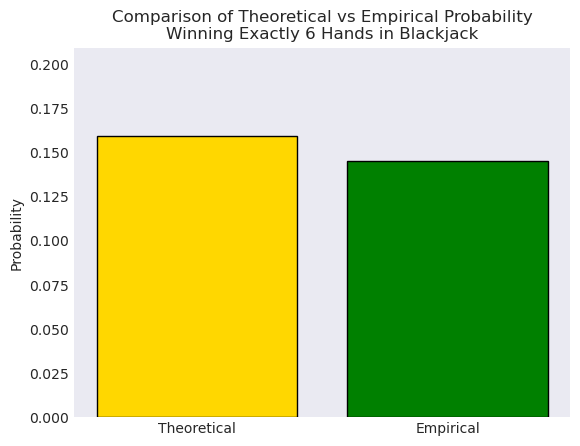

In [15]:
n_hands = 10        # number of hands per game
p_win = 0.45        # probability of winning each hand
n_trials = 1000     # number of simulated games
target_wins = 6     # number of wins we are measuring

# -----------------------------
# SIMULATION (Empirical)
# -----------------------------
# Each row represents one game with 10 hands
trials = np.random.binomial(1, p_win, size=(n_trials, n_hands))
wins_per_game = trials.sum(axis=1)

# Empirical probability: proportion of games with exactly 6 wins
empirical_prob = np.sum(wins_per_game == target_wins) / n_trials

# -----------------------------
# THEORETICAL PROBABILITY
# -----------------------------
theoretical_prob = comb(n_hands, target_wins) * (p_win ** target_wins) * ((1 - p_win) ** (n_hands - target_wins))

# -----------------------------
# DISPLAY RESULTS
# -----------------------------
print(f"Simulated {n_trials} Blackjack games of {n_hands} hands each.")
print(f"Target: Winning exactly {target_wins} hands.")
print(f"Theoretical Probability: {theoretical_prob:.4f}")
print(f"Empirical Probability:   {empirical_prob:.4f}")

# -----------------------------
# BAR CHART COMPARISON
# -----------------------------
plt.bar(['Theoretical', 'Empirical'], [theoretical_prob, empirical_prob],
        color=['gold', 'green'], edgecolor='black')
plt.title(f"Comparison of Theoretical vs Empirical Probability\nWinning Exactly {target_wins} Hands in Blackjack")
plt.ylabel('Probability')
plt.ylim(0, max(theoretical_prob, empirical_prob) + 0.05)
plt.show()